In [ ]:
# Get data

In [4]:
!wget -P ../data/raw/ https://data.webarchive.org.uk/opendata/ukwa.ds.1/classification/classification.tsv

--2020-04-28 17:29:06--  https://data.webarchive.org.uk/opendata/ukwa.ds.1/classification/classification.tsv
Resolving data.webarchive.org.uk (data.webarchive.org.uk)... 185.199.110.153, 185.199.111.153, 185.199.108.153, ...
Connecting to data.webarchive.org.uk (data.webarchive.org.uk)|185.199.110.153|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 3011797 (2.9M) [text/tab-separated-values]
Saving to: ‘../data/raw/classification.tsv’

classification.tsv  100%[===================>]   2.87M  3.05MB/s    in 0.9s    

2020-04-28 17:29:07 (3.05 MB/s) - ‘../data/raw/classification.tsv’ saved [3011797/3011797]



In [5]:
# Imports

In [33]:
import pandas as pd
from pathlib import Path
import matplotlib.pyplot as plt
plt.style.use('seaborn')

In [59]:
# CONSTANTS
path = Path('../data/')

In [60]:
df = pd.read_csv(path/'raw/classification.tsv',sep='\t', error_bad_lines=False)

b'Skipping line 199: expected 4 fields, saw 5\nSkipping line 597: expected 4 fields, saw 5\nSkipping line 614: expected 4 fields, saw 5\nSkipping line 683: expected 4 fields, saw 5\nSkipping line 1146: expected 4 fields, saw 5\nSkipping line 1411: expected 4 fields, saw 5\nSkipping line 1431: expected 4 fields, saw 5\nSkipping line 1532: expected 4 fields, saw 5\nSkipping line 1578: expected 4 fields, saw 5\nSkipping line 3299: expected 4 fields, saw 5\nSkipping line 3325: expected 4 fields, saw 5\nSkipping line 3375: expected 4 fields, saw 5\nSkipping line 3468: expected 4 fields, saw 5\nSkipping line 3469: expected 4 fields, saw 5\nSkipping line 3767: expected 4 fields, saw 5\nSkipping line 3770: expected 4 fields, saw 5\nSkipping line 3842: expected 4 fields, saw 5\nSkipping line 4150: expected 4 fields, saw 5\nSkipping line 5051: expected 4 fields, saw 5\nSkipping line 5290: expected 4 fields, saw 5\nSkipping line 5386: expected 4 fields, saw 5\nSkipping line 7298: expected 4 field

In [64]:
df

,Primary Category,Secondary Category,Title,URL
0,Arts & Humanities,Architecture,68 Dean Street,http://www.sixty8.com/
1,Arts & Humanities,Architecture,Abandoned Communities,http://www.abandonedcommunities.co.uk/
2,Arts & Humanities,Architecture,Alexander Thomson Society,http://www.greekthomson.com/
3,Arts & Humanities,Architecture,"Arab British Centre, The",http://www.arabbritishcentre.org.uk/
4,Arts & Humanities,Architecture,Architectural Association School of Architecture,http://www.aaschool.ac.uk/
...,...,...,...,...
26793,Travel & Tourism,Cornwall,West Briton and Cornwall Advertiser - transcri...,http://freepages.genealogy.rootsweb.ancestry.c...
26794,Travel & Tourism,Cornwall,West Cornwall Community Network,http://www.wccn.org.uk/
26795,Travel & Tourism,Cornwall,West Penwith Resources,http://www.west-penwith.org.uk/
26796,Travel & Tourism,Cornwall,Yeate Farm - the Granary self-catering accommo...,http://www.yeatefarm.co.uk/


## How many categories?

We're going to be trying to predict primary category (at least to start). Lets get an overview:

In [34]:
df['Primary Category'].value_counts()

Arts & Humanities                                              5299
Government, Law & Politics                                     4832
Business, Economy & Industry                                   2988
Society & Culture                                              2984
Science & Technology                                           2420
Medicine & Health                                              2164
Education & Research                                           2118
Company Web Sites                                               843
Digital Society                                                 737
Sports and Recreation                                           710
Religion                                                        417
Travel & Tourism                                                374
Social Problems and Welfare                                     270
Politics, Political Theory and Political Systems                123
Crime, Criminology, Police and Prisons          

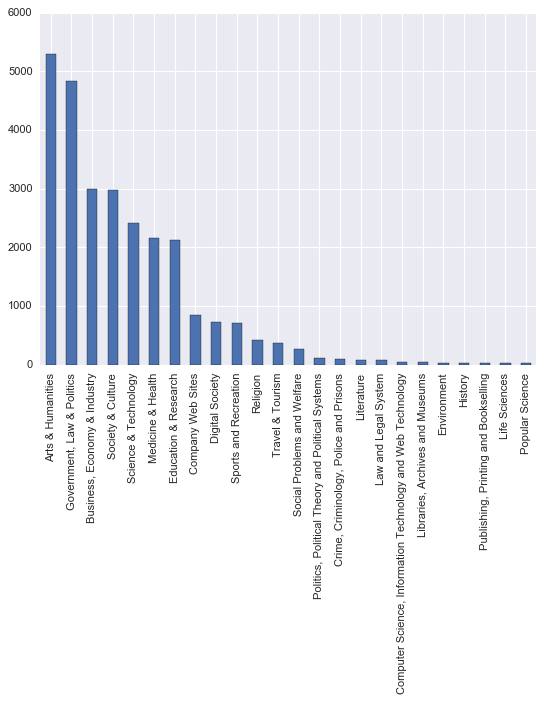

In [35]:
df['Primary Category'].value_counts().plot(kind='bar')

In [50]:
df['Primary Category'].isna().sum()

0

In [55]:
df.isna().sum()

Primary Category      0
Secondary Category    0
Title                 0
URL                   0
dtype: int64

In [57]:
df.describe()

,Primary Category,Secondary Category,Title,URL
count,26798,26798,26798,26798
unique,24,104,13077,12998
top,Arts & Humanities,Cambridge Network,Marxism Festival,http://www.marxismfestival.org.uk/
freq,5299,1686,34,34


In [63]:
df.to_csv(path/'interim/classification.tsv')